# Finding the Best Markets to Advertise In an E-learning Product

Suppose that we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

Our goal in this project is to **find out the two best markets to advertise our product in, for \$59 per subscription**.

## Understanding the Data

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, so the other great option is to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). 

*freeCodeCamp* is a free e-learning platform that offers courses on web development. Because theu run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey's raw data can be found [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#to avoide truncated columns and rows
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(direct_link, low_memory=0)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
survey.shape

(18175, 136)

About more than 18,170 new coders have been surveyed in 2017.

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, such as data science, game development, etc. For this purpose, we want to answer questions about a **population** of new coders who are interested in the subjects we teach. We'd like to know:
- Where are these new coders located;
- What are the locations with the greatest of new coders;
- How much money the newbies are willing to spend on learning.

Before kicking off our analysis, we need to clarify whether the sample data we have is representative for our population of interest and it has the right categories of people for our purpose.

The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.

In [3]:
survey['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

Generally, the table shows that:
- Most of new coders are interested in wed development (Full-stack, front-end, back-end development).
- A few people are interested in mobile development.
- A few people are intersted in other domains like data science, game development and information security.

We also notice that many respondents are interested in more than one subject. It'd be useful to get a better picture of the people who are interested in a single subject and the ones who have mixed interested.

In [4]:
# split each string in 'JobRoleInterest' column
options = survey['JobRoleInterest'].copy().dropna().str.split(',')

# frequency table describing the number of options
n_options = options.apply(lambda x: len(x))  # x is a list of job options
n_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that: 
- Roughly 31.7% of the respondents have a clear idea about what job they'd like to apply to.
- 10% of the survey have 2 options to choose of their career.
- The vast of majority of the respondents (up to 59%) have mixed interests (3 options and more). In other words, they don't have a clue yet to decide what option to follow. Nonetheless, given that we offer courses on various subjects, the fact that new coders have mixed interest might be good for our analysis.

The focus of our analysis is on web and mobile development, so let's find out how many people chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


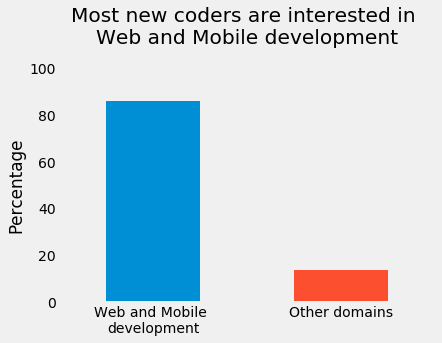

In [5]:
# Return a boolean table, True if contains at least 2 options, otherwise False
web_or_mobile = survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')

# Frequecy table
freq_table = web_or_mobile.value_counts(normalize=True)*100  
print(freq_table)

# Graph the frequency table above
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most new coders are interested in \nWeb and Mobile development', y = 1.08)
plt.xticks([0,1], ['Web and Mobile \ndevelopment', 'Other domains'], rotation=0)
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.grid(False)
plt.show()

As we can see, roughly 86% of the respondents chosen at least one of the 2 options we focus on. These figures give us a strong reason to consider this sample as **representative** for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but essentially web and mobile development.

Now we can begin analyzing the data. Let's start with finding out where these new coders are located, and what are the densities for each location.

## New Coders - Locations and Densities

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market. This means we can frame our goal as finding the **two best countries to advertise in**.

We're working with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads.

One indicator of a good market is the number of potential customers - the more potental customers in a market, the better. If our ads manage to convice 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [6]:
# To make sure we're working with a representative sample, 
# drop all the rows where participants didn't answer what role interested
good_survey = survey[survey['JobRoleInterest'].notnull()].copy()

# Frequency table in Absolute and Relative values
abs_freq = good_survey['CountryLive'].value_counts()
rel_freq = good_survey['CountryLive'].value_counts(normalize=True) * 100

# Display the 2 frequency tables in a more readable format
data = {
    "Absolute frequency": abs_freq,
    "Percentage": rel_freq
}
pd.DataFrame(data)

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


We can see that 45.7% of the population of interest is living in the USA. 7.7% is living in India. The UK arrived at third with 4.6% of participants living and the Canada followed behind with 3.8%

The USA and India are no doubt the 2 most important markets we'd choose for advertisement.

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising within markets where most people are onlu willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they start coding until the moment the completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends *per month*.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the UK and Canada, because these are the countries that have the highest absolute frequencies in our sample, which means we have a decent amount of data for each. 

Additionally, thinking of the language we're teaching, which is English. This is actually an official language in all these four countries. The more people that speak English, the better our chances to hit the right target with our ads. 

Let's get started by creating a new column that describes the money a student has spent per month.

In [7]:
# Replace 0 by 1 to avoid dividing by 0
good_survey['MonthsProgramming'].replace(0,1, inplace=True)

good_survey['SpentPerMonth'] = good_survey['MoneyForLearning'] / good_survey['MonthsProgramming']
good_survey['SpentPerMonth'].isnull().sum()

675

In [8]:
# Keep only rows that don't have a null value for the 'SpentPerMonth' column
good_survey = good_survey[good_survey['SpentPerMonth'].notnull()]

# We want to group data by Country, so remove also any rows that have null values in the 'CountryLive' column
good_survey = good_survey[good_survey['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
good_survey['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This should be enough. Let's compute the average of the money spent per month, grouped by countries.

In [9]:
countries_mean = good_survey.groupby(['CountryLive']).mean()
countries_mean['SpentPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

According to the table:
- Participants living in the USA spend roughly 228 dollars per month on average, people in India 135 dollars and in Canada 113.5 dollars, which is much higher than the price at which we are going to sell, $59.
- Participants in the UK, however, spend only \$45.5 per month on average for learning, which is a surprise compared to India. In fact, considering a few social-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we'd intuitively expect people in the UK (and even in Canada) to spend more on learning than people in India.

It might be that we don't get enough representative data for the UK and Canada, or we have some outliers making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

We're going to generate four box plots to visualize data of 4 countries (the US, India, the UK, Canada) to spot outliers.

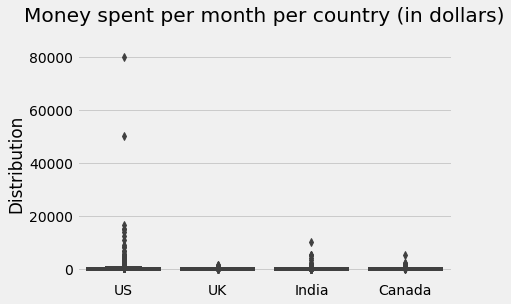

In [10]:
only_4 = good_survey[good_survey['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')
                    ]
import seaborn as sns
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=only_4)
plt.title('Money spent per month per country (in dollars)', y = 1.08)
plt.xticks(range(4),['US','UK','India','Canada'])
plt.xlabel('')
plt.ylabel('Distribution')

plt.show()

It is not evident to spot the outliers in the UK, India and Canada box plots.

It's easy however to recognize that there are some outliers in the US box plot: 2 persons spend each month 500,000 dollars or more for learning, which is impossible, but it seems extremely unlikely, so we'll remove every value that goes over $20,000 per month.

In [11]:
good_survey = good_survey[good_survey['SpentPerMonth'] < 20000]

Let's recompute the mean values so far.

In [12]:
countries_mean = good_survey.groupby(['CountryLive']).mean()
countries_mean['SpentPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

Regraph the box plot of 4 countries

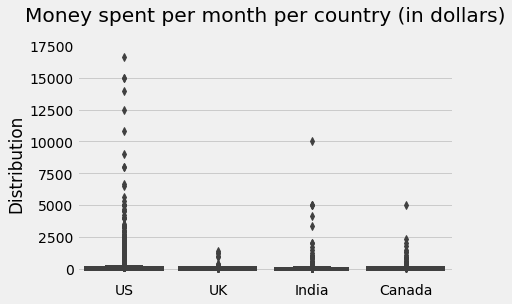

In [13]:
only_4 = good_survey[good_survey['CountryLive'].str.contains(
'United States of America|India|United Kingdom|Canada')
                    ]
import seaborn as sns
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=only_4)
plt.title('Money spent per month per country (in dollars)', y = 1.08)
plt.xticks(range(4),['US','UK','India','Canada'])
plt.xlabel('')
plt.ylabel('Distribution')

plt.show()

We can spot some extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Let's examine whether this outlier persons attended any bootcamp, which might justify the large amount of money spent.

In [14]:
outliers_india = good_survey[(good_survey['CountryLive'] == 'India') & (good_survey['SpentPerMonth'] > 2500)]
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

It's likely that these person have never attended a bootcamp, which is illogical to the money spent on learning. Thus we need to remove these rows as well.

In [15]:
only_4 = only_4.drop(outliers_india.index)

Looking back to the US box plot, we can spot outliers over \$6000 per month. Let's check these out.

In [16]:
outliers_usa = only_4[
    (only_4['CountryLive'] == 'United States of America') & (only_4['SpentPerMonth'] >= 6000)
]

outliers_usa

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

There are 6 out of these 11 outliers have attended bootcamps, which justifys the large sums of money spent on learning. For the other 5, however, it's hard to figure out where they could have spent that much money on learning. Consequently, we'll remove these 5 outliers (they have reportedly spent over \$6000 per month, but they have never attended a bootcamp).

Also, the data shows that 8 respondents had been programming for no more than three months when they completed the survey. They most likely paid a huge amount of money for a bootcamp that was going to last for several months, so the sums of money spent per month is unrealistic and should be significantly lower. Or maybe the bootcamp had asked them to paid within 3 first months for the whole program (that might last 12 months or more). Therefore, we'll remove every these 8 outliers.

In the next code block, we'll remove respondents who are living in the US and who have spent over $6000 per month but:
- Didn't attend bootcamps
- or Had been programming for three months or less at the time they completed the survey.

In [19]:
# Remove respondents who didn't attend a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['SpentPerMonth'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove respondents who had been programming for less than 3 months
less_than_3mths = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['SpentPerMonth'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3mths.index)

Looking again at the last box plot above, we can also spot an extreme outlier for Canada - a person who have spent roughly $5000 per month. Let's check it out.

In [21]:
outliers_canada = only_4[
    (only_4['CountryLive'] == 'Canada') & (only_4['SpentPerMonth'] > 4000)
]
outliers_canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents: this one had been programming for no more than 2 months when he completed the survey. He seems to have paid a large sum of money to enroll in a bootcamp because the bootcamp fee is not "monthly", then he probably didn't spend anything for the next couple of months after the survey. We remove this outlier then.

In [22]:
only_4 = only_4.drop(outliers_canada.index)

Let's recompute the mean values and generate the final box plots.

In [24]:
only_4.groupby('CountryLive').mean()['SpentPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: SpentPerMonth, dtype: float64

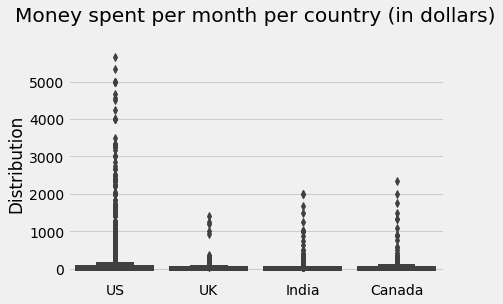

In [23]:
sns.boxplot(x='CountryLive', y='SpentPerMonth', data=only_4)
plt.title('Money spent per month per country (in dollars)', y = 1.08)
plt.xticks(range(4),['US','UK','India','Canada'])
plt.xlabel('')
plt.ylabel('Distribution')

plt.show()

## Choosing the Two Best Markets

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a reasonable amount of money each month.

We need to choose one more market though, recalling that we sell subscriptions at a price at \$59 per month.

Canada seems to be the best second choice because people there are willing to pay roughly 93 dollars per month for learning, compared to India (66 dollars) and the UK (45 dolars).

The data suggest strongly that we shouldn't advertise in the UK, but let's take a second look at India in terms of potential customers before deciding to choose Canada as out second best choice.

In [25]:
only_4['CountryLive'].value_counts(normalize=True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

We have almost twice as more potential customers in India than we have in Canada, and 59 dollars is considered as reasonable in India as well because people there spend roughly \$66 per month on average.

So it's not crystal clear which to choose between Canada and India as the second best market. We have several possibilities:

1. Advertise in the US, India and Canada by splitting the advertisement budget in various combinations:
    * 60% US, 20% India, 10% Canada.
    * 50% US, 20% India, 20% Canada if we foresee that Canada is more demanding in the futur.
    * 50% US, 30% India, 10% Canada if we foresee that the market in India is growing up.
    etc.
2. Advertise only in the USA and India, or the US and Canada:
    * 70% US, 30% India.
    * 65% US, 35% Canada.
    etc.
3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new data survey.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we drawn is that the US would be the best market to advertise in.

For the second best market, we hesitate between India and Canada. So we decided to send the results to the marketing team so they can use their knowledge to make a better decision.